In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-retail-sales/Fashion_Retail_Sales.csv


Retail data can sometimes reveal surprising behavior in consumer spending patterns. In this notebook, I explore a dataset of fashion retail sales. this analysis will take me through data loading, cleaning, visualization.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensure correct backend when only plt is imported
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Suppress warnings to keep the notebook output clean
import warnings
warnings.filterwarnings('ignore')

# Set a seaborn style
sns.set_style('whitegrid')


# **Data Loading and Overview** 

In [3]:
# Load the fashion retail sales dataset
df = pd.read_csv('/kaggle/input/fashion-retail-sales/Fashion_Retail_Sales.csv', encoding='ascii', delimiter=',')

# Display the first few rows to get an overview of the dataset
print('First few rows of the dataset:')
display(df.head())

# Display basic information about the dataset
print('\nDataset Info:')
df.info()

# Display basic statistics
print('\nStatistical Summary:')
display(df.describe(include='all'))

First few rows of the dataset:


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB

Statistical Summary:


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
count,3400.000000,3400,2750.000000,3400,3076.000000,3400
unique,NaN,50,NaN,365,NaN,2
top,NaN,Belt,NaN,22-09-2023,NaN,Credit Card
freq,NaN,90,NaN,17,NaN,1770
mean,4039.660588,NaN,156.709818,NaN,2.999057,NaN
std,48.122583,NaN,419.536669,NaN,1.156505,NaN
min,3957.000000,NaN,10.000000,NaN,1.000000,NaN
25%,3997.000000,NaN,57.000000,NaN,2.000000,NaN
50%,4040.000000,NaN,110.000000,NaN,3.000000,NaN
75%,4081.000000,NaN,155.750000,NaN,4.000000,NaN


# **Data Cleaning and Preprocessing**

In [4]:
# Check for missing values
print('Missing values in each column:')
display(df.isnull().sum())

# Convert 'Date Purchase' column from string to datetime
# We infer the type is a date; if any errors arise during conversion, we use errors='coerce' to handle invalid dates
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], errors='coerce')

# Verify the conversion
print('\nData types after conversion:')
display(df.dtypes)

# If encountering any issues with date conversion, ensure that your system locale and date format settings are properly configured.


Missing values in each column:


Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


Data types after conversion:


Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                   object
dtype: object

# Analysis based on Queston-1
Are there seasonal trends in fashion sales?  
Hypothesis: Sales peak during holiday months (e.g., December, November).

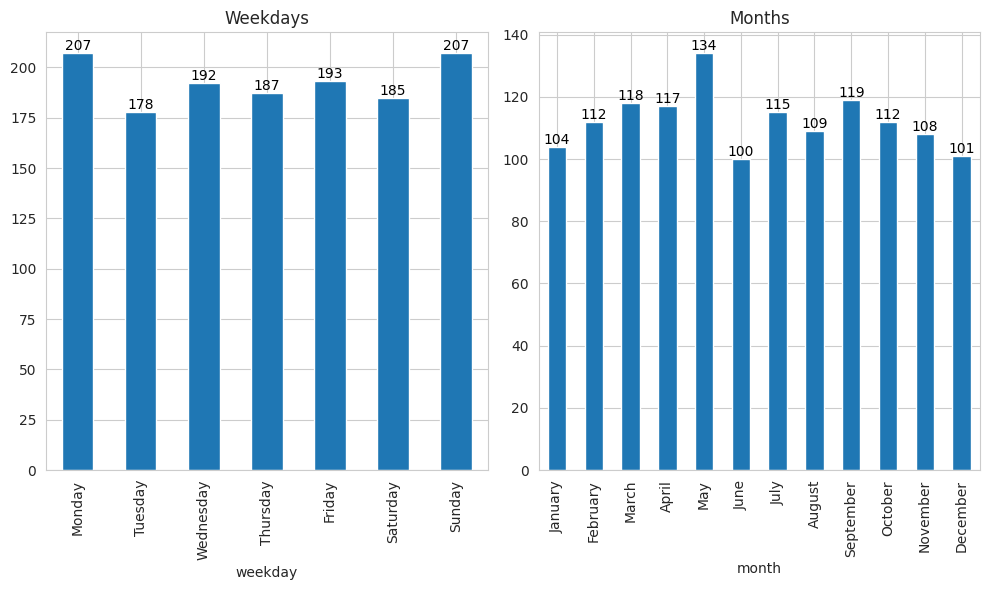

In [5]:
#reveal human-centric Pattern

from datetime import datetime

def process_date(x):
    # Directly use Timestamp properties
    return [x.month, x.weekday()]


weekdays = ["Monday", "Tuesday", "Wednesday",
           "Thursday", "Friday", "Saturday", "Sunday"]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

df["weekday"] = df["Date Purchase"].apply(lambda x: process_date(x)[1])
df["month"] = df["Date Purchase"].apply(lambda x: process_date(x)[0])

fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

df["weekday"].value_counts().sort_index().plot(kind="bar", ax=axes[0])
axes[0].set_xticklabels(weekdays)
axes[0].set_title("Weekdays")

df["month"].value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_xticklabels(months)
axes[1].set_title("Months")

def bar_labels(ax):
    """Adds labels to bars in a bar plot."""
    for bar in ax.patches:
        ax.annotate(
            f'{bar.get_height():.0f}',
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom', fontsize=10, color='black'
        )

bar_labels(axes[0])
bar_labels(axes[1])

plt.tight_layout()
plt.show()


this analysis Includes all products, even low-performing or randomly sold ones, which can introduce noise and obscure real seasonal patterns.  
Second way of Analysis is based on first select N best seller product and then discover seasonal trend that Focuses on high-impact products — those that actually define trends or consumer interest.  

# seasonal trend in bestseller items

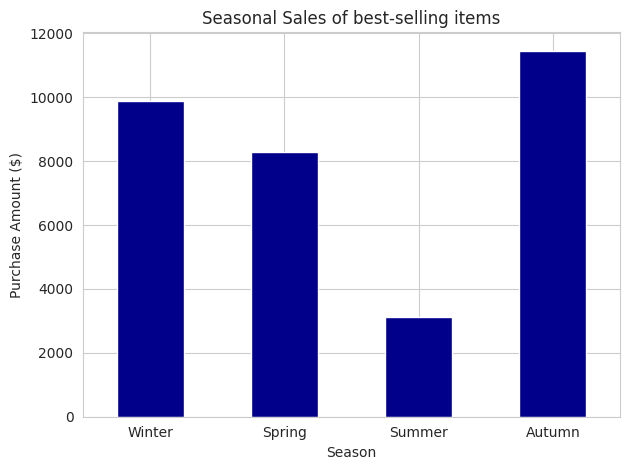

In [6]:
# change date purchse to datetime
df["Date Purchase"] = pd.to_datetime(df["Date Purchase"], format="%d-%m-%Y", errors="coerce")

# clear rowes without purchase amount 
df = df.dropna(subset=["Purchase Amount (USD)"])

# create month and season
df["month"] = df["Date Purchase"].dt.month
df["season"] = df["Date Purchase"].dt.month % 12 // 3 + 1

# find Bestseller item 
item_sales = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum()

# choose top 10 
top_items = item_sales[item_sales >= item_sales.quantile(0.90)].index

# filter top 10 
df_top = df[df["Item Purchased"].isin(top_items)]

seasonal_sales = df_top.groupby("season")["Purchase Amount (USD)"].sum()

import matplotlib.pyplot as plt
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"}
seasonal_sales.rename(index=season_labels).plot(kind="bar", color="darkblue")
plt.title("Seasonal Sales of best-selling items")
plt.ylabel("Purchase Amount ($)")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


it's better than preveious but stll has work to get insight about trends in this market.  
Imagine if we have 10 Best seller ineach seasion in one chart,It could be better than just number in the chart.  
let’s now sort the heatmap by total sales across all seasons.


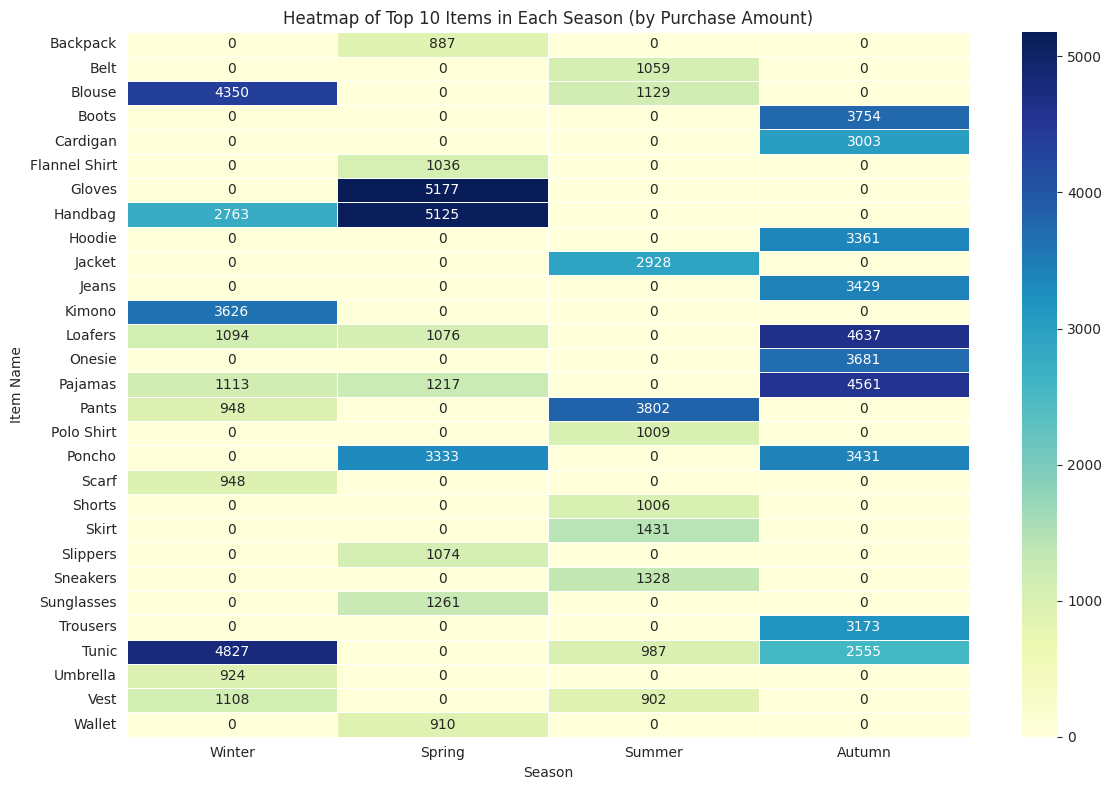

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you already have a DataFrame 'df' with proper date formatting
df["Date Purchase"] = pd.to_datetime(df["Date Purchase"], format="%d-%m-%Y", errors="coerce")
df = df.dropna(subset=["Purchase Amount (USD)"])

# Add season column
df["season"] = df["Date Purchase"].dt.month % 12 // 3 + 1
season_labels = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"}
df["season"] = df["season"].map(season_labels)

# Get top 10 items per season
top_items_per_season = (
    df.groupby(["season", "Item Purchased"])["Purchase Amount (USD)"].sum()
    .groupby(level=0, group_keys=False)
    .nlargest(10)
    .reset_index()
)

# Create pivot table: items vs seasons
heatmap_data = (
    top_items_per_season
    .pivot_table(index="Item Purchased", columns="season", values="Purchase Amount (USD)", fill_value=0)
)

# Reorder columns (optional)
heatmap_data = heatmap_data[["Winter", "Spring", "Summer", "Autumn"]]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Top 10 Items in Each Season (by Purchase Amount)")
plt.ylabel("Item Name")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


It's a little confusing when face with heatmap but in the explosion way, I prefer sort version of heatmap that show  highlight recurring top sellers  
- items that appear in the top 10 list for multiple seasons -

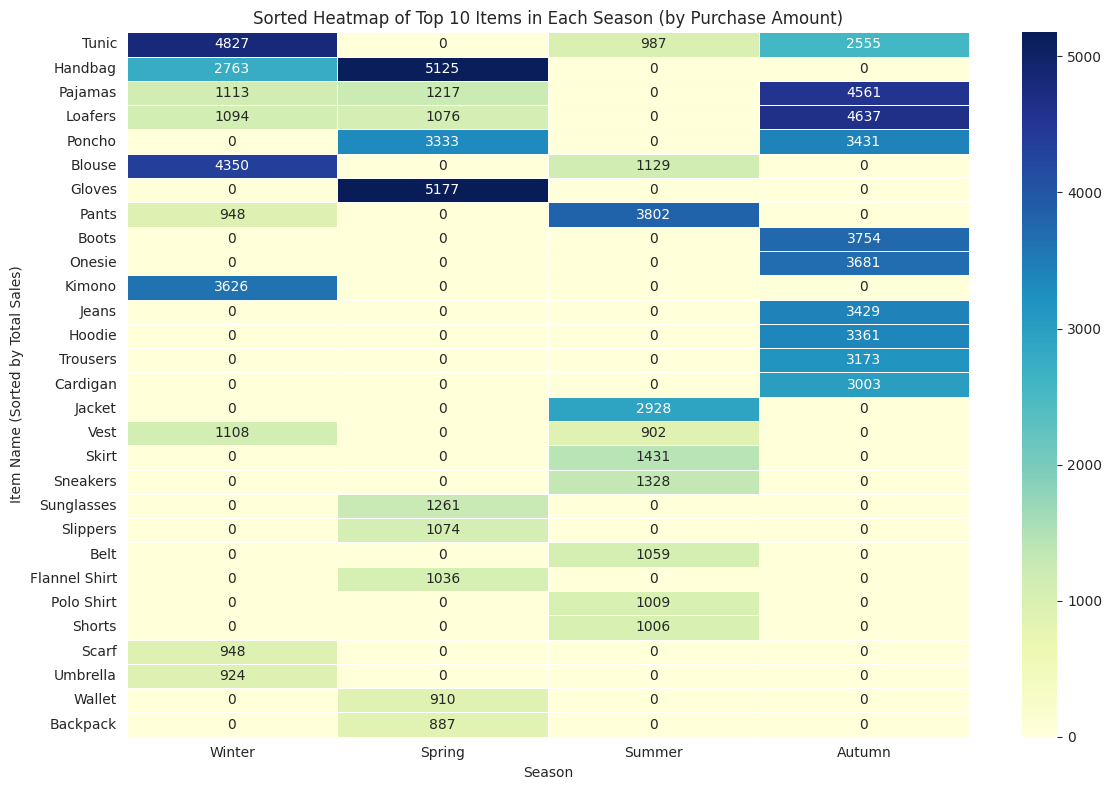

In [8]:
# Add a total column to sort by overall sales
heatmap_data["Total Sales"] = heatmap_data.sum(axis=1)

# Sort by total sales descending
heatmap_data = heatmap_data.sort_values("Total Sales", ascending=False)

# Remove 'Total Sales' before plotting
heatmap_to_plot = heatmap_data.drop(columns="Total Sales")

# Plot the sorted heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_to_plot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Sorted Heatmap of Top 10 Items in Each Season (by Purchase Amount)")
plt.ylabel("Item Name (Sorted by Total Sales)")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


**This heatmap shows items that repeat in top sales across seasons.**

You can now ask questions like:   

Which items are trend-stable?  

Are there any all-season products?  

Which season boosts certain items?  

with focus of only 10 product wehave better poit of view 


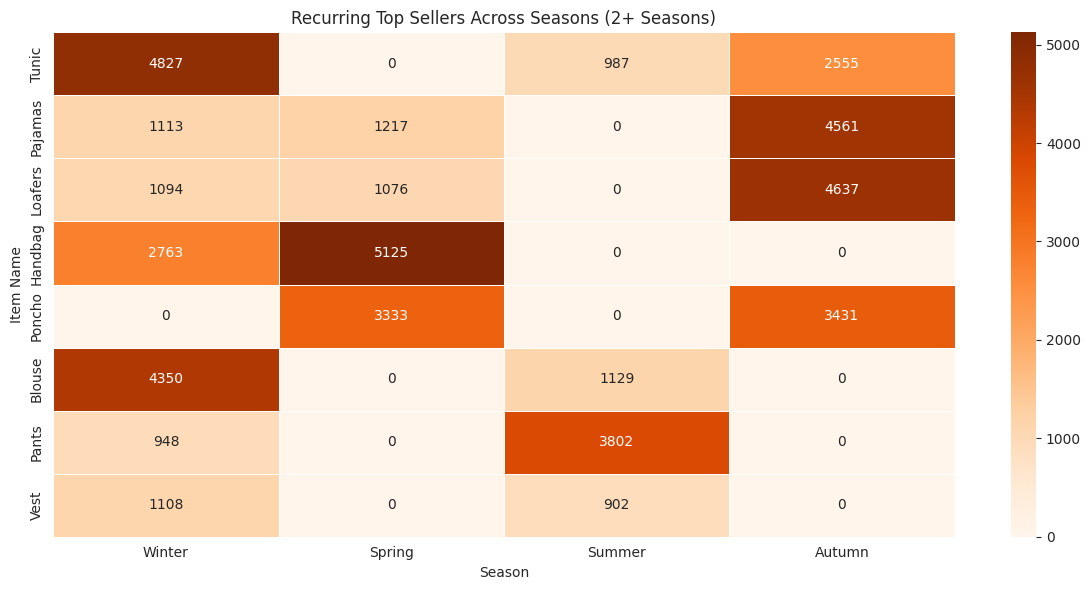

In [9]:
# Count how many seasons each item appears in
heatmap_data["Season Count"] = (heatmap_to_plot > 0).sum(axis=1)

# Sort by season count and then by total sales
heatmap_data["Total Sales"] = heatmap_to_plot.sum(axis=1)
heatmap_data = heatmap_data.sort_values(["Season Count", "Total Sales"], ascending=[False, False])

# Filter for items that appear in 2 or more seasons (adjust threshold if needed)
recurring_items = heatmap_data[heatmap_data["Season Count"] >= 2].drop(columns=["Season Count", "Total Sales"])

# Plot heatmap for recurring top sellers
plt.figure(figsize=(12, 6))
sns.heatmap(recurring_items, annot=True, fmt=".0f", cmap="Oranges", linewidths=0.5)
plt.title("Recurring Top Sellers Across Seasons (2+ Seasons)")
plt.ylabel("Item Name")
plt.xlabel("Season")
plt.tight_layout()
plt.show()
